Video 6

Thresholding

It is a method to make the image more readable.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('bookpage.jpg')
grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [3]:
retval, threshold = cv2.threshold(img, 12, 255, cv2.THRESH_BINARY)
cv2.imshow('threshold', threshold)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
retval1, threshold1 = cv2.threshold(grayscale, 12, 255, cv2.THRESH_BINARY)
cv2.imshow('threshold1', threshold1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
#ADAPTIVE THRESHOLD
#cv2.adaptiveThreshold(image_obj, High_Value, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, type, 115, 1)    1->Brightness level

gaus = cv2.adaptiveThreshold(grayscale, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1)
cv2.imshow('gaus', gaus)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
retval3, otsu = cv2.threshold(grayscale, 125, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
cv2.imshow('otsu', otsu)
cv2.waitKey(0)
cv2.destroyAllWindows()
#otsu not recommended for thsi

Video 7

Color Filtering


In [7]:
#fourcc = cv2.VideoWriter_fourcc(*'XVID')
#out = cv2.VideoWriter('Yellow.avi', fourcc, 20.0, (640, 480))
cap = cv2.VideoCapture(0)

while True:
    _, frame = cap.read()
    
    #converting to hsv
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    #setting limits
    lower_yellow = np.array([20, 0, 0])
    upper_yellow = np.array([30, 255, 255])
    
    #creating a mask
    mask = cv2.inRange(hsv, lower_yellow, upper_yellow)
    res = cv2.bitwise_and(frame, frame, mask=mask)
    
    #showing
    cv2.imshow('frame', frame)
    cv2.imshow('mask', mask)
    cv2.imshow('res', res)
    
    #out.write(res)
    
    if cv2.waitKey(1) & 0xFF==ord('q'):
        break
        
cv2.destroyAllWindows()
cap.release()

Video 7

Blurring and Smoothing

In [8]:
#fourcc = cv2.VideoWriter_fourcc(*'XVID')
#out = cv2.VideoWriter('Yellow.avi', fourcc, 20.0, (640, 480))
cap = cv2.VideoCapture(0)

while True:
    _, frame = cap.read()
    
    #converting to hsv
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    #setting limits
    lower_yellow = np.array([20, 0, 0])
    upper_yellow = np.array([30, 255, 255])
    
    #creating a mask
    mask = cv2.inRange(hsv, lower_yellow, upper_yellow)
    res = cv2.bitwise_and(frame, frame, mask=mask)
    
    kernel = np.ones((15, 15), np.float32)
    smoothed = cv2.filter2D(res, -1, kernel)
    
    
    blur = cv2.GaussianBlur(res, (15, 15), 0)  #  0 -> The value of blurredness
    median = cv2.medianBlur(res, 15)
    bilateral = cv2.bilateralFilter(res, 15, 75, 75)  # 75 -> The value of blurredness
    
    #showing
    cv2.imshow('frame', frame)
    cv2.imshow('res', res)
    cv2.imshow('smoothed', smoothed)
    cv2.imshow('blur', blur)
    cv2.imshow('median', median)
    cv2.imshow('bilateral', bilateral)
    
    #out.write(res)
    
    if cv2.waitKey(1) & 0xFF==ord('q'):
        break
        
cv2.destroyAllWindows()
cap.release()



SyntaxError: invalid syntax (<ipython-input-8-29f9c496d4bb>, line 41)

Video 8

Morphological Transitions

In [9]:
cap = cv2.VideoCapture(0)

while True:
    _, frame = cap.read()
    
    #converting to hsv
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    #setting limits
    lower_yellow = np.array([20, 0, 0])
    upper_yellow = np.array([30, 255, 255])
    
    #creating a mask
    mask = cv2.inRange(hsv, lower_yellow, upper_yellow)
    res = cv2.bitwise_and(frame, frame, mask=mask)
    
    #morphological transformations
    kernel = np.ones((5,5), np.uint8)   #it also affects size
    erosion = cv2.erode(mask, kernel, iterations=1)  #less iterations means less size of black squares, it has false negatives
    dilated = cv2.dilate(mask, kernel, iterations=1)  #same thing with iterations and has false positives
    
    opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    #Tophat - difference between input of image and opening
    #Blackhat - difference between closing of image and input
    
    #showing
    cv2.imshow('frame', frame)
    cv2.imshow('mask', mask)
    cv2.imshow('erosion', erosion)
    cv2.imshow('dilated', dilated)
    cv2.imshow('opening', opening)
    cv2.imshow('closing', closing)
    
    #out.write(res)
    
    if cv2.waitKey(1) & 0xFF==ord('q'):
        break
        
cv2.destroyAllWindows()
cap.release()

Video 9

Gradients - help in edge detection

Edge detection through Canny()

In [11]:
cap = cv2.VideoCapture(0)

while True:
    _, frame = cap.read()
    grayscale = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    laplacian = cv2.Laplacian(frame, cv2.CV_64F)
    #sobelx = cv2.Sobel(frame, cv2.CV_64F, 1, 0, ksize=5)
    #sobely = cv2.Sobel(frame, cv2.CV_64F, 0, 1, ksize=5)
    
    #edges = cv2.Canny(frame, 100, 200)
    
    cv2.imshow('original', frame)
    cv2.imshow('laplacian', laplacian)
    #cv2.imshow('sobelx', sobelx)
    #cv2.imshow('sobely', sobely)
    #cv2.imshow('edges', edges)
    
    
    if cv2.waitKey(1) & 0xFF==ord('q'):
        break
        
cv2.destroyAllWindows()
cap.release()

Video 10

Finding a template in an image

In [64]:
img = cv2.imread('templateimg.jpg')
template = cv2.imread('template', 0)

In [65]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray.shape

(703, 1018)

In [66]:
w, h = template.shape[::-1]    #[::-1] gives the transpose of the matrix

In [67]:
res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
res.shape

(682, 1000)

In [68]:
cv2.imshow('res', res)
cv2.imshow('img_gray', img_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [69]:
threshold = 0.8
loc = np.where(res>=threshold)

In [70]:
loc

(array([101, 101, 102, 102, 102, 103, 103, 151, 151, 151, 152, 152, 152,
        153, 153, 153, 199, 200, 200, 201, 201, 246]),
 array([545, 546, 545, 546, 547, 545, 546, 543, 544, 545, 543, 544, 545,
        543, 544, 545, 541, 540, 541, 540, 541, 538]))

In [71]:
for i in zip(*loc[::-1]):
    print(i)

(545, 101)
(546, 101)
(545, 102)
(546, 102)
(547, 102)
(545, 103)
(546, 103)
(543, 151)
(544, 151)
(545, 151)
(543, 152)
(544, 152)
(545, 152)
(543, 153)
(544, 153)
(545, 153)
(541, 199)
(540, 200)
(541, 200)
(540, 201)
(541, 201)
(538, 246)


In [72]:
for pt in zip(*loc[::-1]):
    cv2.rectangle(img, pt, (pt[0]+w, pt[1]+h), (0, 255, 255), 1)
    
cv2.imshow('detected', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

VIdeo 11

GrabCut Foreground Extraction

In [76]:
import matplotlib.pyplot as plt

img = cv2.imread('grabCut.jpg')
mask = np.zeros(img.shape[:2], np.uint8)
img.shape[:2]

(281, 500)

In [78]:
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

rect = (50, 50, 300, 300)

cv2.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[1.70591609e-01, 2.02484005e-01, 2.82434539e-01, 2.44341094e-01,
         1.00148754e-01, 1.76058675e+02, 2.07380102e+02, 2.23290119e+02,
         6.02964684e+01, 7.87912020e+01, 1.01764826e+02, 1.13088013e+02,
         1.44791453e+02, 1.49273939e+02, 2.62028093e+01, 2.34799575e+01,
         2.93582352e+01, 5.78199714e+01, 1.49727720e+02, 1.98492037e+02,
         1.09437125e+03, 8.97459181e+02, 6.96082678e+02, 8.97459181e+02,
         8.87765908e+02, 7.30983017e+02, 6.96082678e+02, 7.30983017e+02,
         6.50530161e+02, 1.15107891e+03, 1.02097667e+03, 6.66078484e+02,
         1.02097667e+03, 1.60411900e+03, 1.39848714e+03, 6.66078484e+02,
         1.39848714e+03, 1.62133140e+03, 2.77903416e+02, 1.76722524e+02,
         2.03138717e+02, 1.76722524e+02, 1.4

In [84]:
cv2.imshow('mask', mask*50)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [90]:
mask2 = np.where((mask==2)|(mask==0),0, 1).astype('uint8')   #0 if true, 1 if false
cv2.imshow('mask', mask2*255)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [87]:
print(mask.shape)
print(mask2.shape)

(281, 500)
(281, 500)


In [92]:
mask2[:, :, np.newaxis].shape

(281, 500, 1)

In [93]:
img1 = cv2.bitwise_and(img, img, mask=mask2)
img2 = img*mask2[:, :, np.newaxis]  #that is how masking worksssss
cv2.imshow('img1', img1)
cv2.imshow('img2', img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

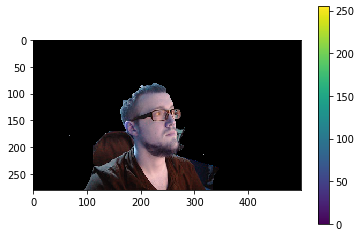

In [94]:
plt.imshow(img2)
plt.colorbar()
plt.show()